### 결정 트리 (Decision Tree)
- 매우 쉽고 유연하게 적용 될 수 있는 알고리즘으로서 데이터의 스케일링, 정규화 등의 데이터 전처리의 의존도가 매우 적다.
- 학습을 통해 데이터에 있는 규칙을 자동으로 찾아내서 Tree 기반의 분류 규칙을 만든다.
- 각 특성이 개별적으로 처리 되어 데이터를 분할 하는데 데이터 스케일의 영향을 받지 않으므로 결정트리에서는 정규화나 표준화 같은 전처리 과정이 필요없다.
- 영향을 가장 많이 미치는 feature를 찾아낼 수도 있다.
- 예측 성능을 계속해서 향상 시키면 복잡한 규칙 구조를 가지기 때문에 <sub>※</sub>과적합(Overfitting)이 발생해서 예측 성능이 저하 될 수도 있다.
- 가장 상위 노드를 "루트 노드" 라고 하며, 나머지 분기점을 "서브 노드", 결정된 분류값 노드를 "리프 노드"라고 한다.
<img src="./images/decision_tree.png" width="550" style="margin-top:20px; margin-bottom:20px">

- 복잡도를 감소 시키는 것이 주 목적이며, 정보의 복잡도를 불순도(Impurity)라고 한다.
- 이를 수치화한 값으로 지니 계수 (Gini coeficient)가 있다.
- 클래스가 섞이지 않고 분류가 잘 되었다면, 불순도 낮다.
- 클래스가 많이 섞여 있고 분류가 잘 안되었다면, 불순도 높다.
- 통계적 분산 정도를 정량화 하여 표현한 값이고, 0과 1 사이의 값을 가진다.
- 지니 계수가 낮을 수록 불순도가 낮은것이고, 분류가 잘 된 것이다.
---
<sub>※ 과적합이란, 학습 데이터를 과하게 학습 시켜서 실제 데이터에서는 오차가 오히려 증가하는 현상이다.</sub>  

<img src="./images/overfitting.png" width="350" style="margin-left :-10px">


#### Graphviz
- 결정트리 모델을 시각화할 수 있다.
- https://graphviz.org/download/  
  graphviz-9.0.0 (64-bit) EXE installer [sha256]
- https://drive.google.com/file/d/1oCXidIjNAvUT2UcNFEdhRfFhnZ96iHrp/view?usp=sharing

In [1]:
import graphviz

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()
iris = load_iris()

X_train, X_test, y_train, y_test = \
train_test_split(iris.data, iris.target, test_size=0.2, random_state=124)
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc, out_file='./images/iris_dtc01.dot',
    class_names=iris.target_names,
    feature_names=iris.feature_names,
    impurity=True,
    filled=True)

In [4]:
import graphviz
with open('./images/iris_dtc01.dot') as f:
    iris_dtc01 = f.read()
iris_dtc01_graph = graphviz.Source(iris_dtc01)

iris_dtc01_graph.render(filename="iris_dtc01", directory="./images", format="png")

In [6]:
iris_dtc01_graph.render(filename="iris_dtc01", directory="./images", format="png")

'images\\iris_dtc01.png'

<img src="./images/iris_dtc01.png">

#### Feature 별 중요도 
**각 feature가 분류를 나누는 데에 얼마나 큰 영향을 미쳤는지를 표기하는 척도이다.**
- feature_importances_
- 분류를 결정하는 데에 얼만큼 기여했는 지를 feature별로 수치를 리턴해준다.

In [12]:
print(iris.feature_names)
print(dtc.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.         0.         0.57588361 0.42411639]


In [14]:
for name, value in zip(iris.feature_names,dtc.feature_importances_) :
    print(f'{name} : {round(value * 100, 2)}%')

sepal length (cm) : 0.0%
sepal width (cm) : 0.0%
petal length (cm) : 57.59%
petal width (cm) : 42.41%


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


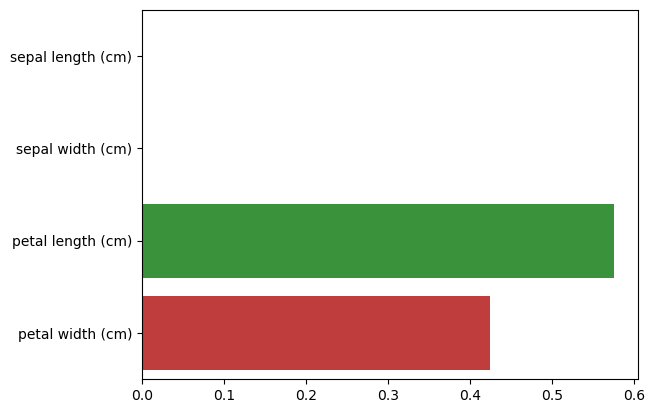

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=iris.feature_names)
plt.show()

#### 결정 트리의 과적합 
- 위에서 알아낸 것 처럼 petal length, petal width, 2개의 feature 만으로도 분류가 가능하기 때문에, 2차원 산점도를 통해 시각화 할 수 있다.
- 마지막 까지 노드가 분리되었기 때문에 과적합이 발생했을 가능성이 있고, 이를 <sub>※</sub> 하이퍼 파라미터 튜닝을 통해 해결할 수 있다.

<sub>※ 하이퍼 파라미터란, 최적의 훈련 모델을 구현하기 위해 알고리즘의 수치를 조정할 수 있는 변수를 의미한다.</sub>


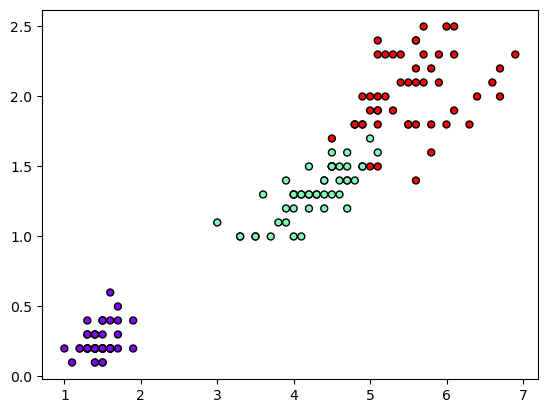

In [25]:
features, targets = iris.data, iris.target
plt.scatter(features[:,2],features[:,3], c=targets, edgecolors='k', cmap="rainbow", s=25)
plt.show()
# 3개